Loading libraries etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Loading the dataset

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

netflix_df.info(), netflix_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(None,
   show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  S

Preprocessing and Cleaning Dataset

In [3]:
netflix_df.columns = netflix_df.columns.str.strip()


In [4]:
missing_values = netflix_df.isnull().sum().sort_values(ascending=False)

In [5]:
netflix_df['date_added'] = netflix_df['date_added'].str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [6]:
# Extract year and month
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [20]:
netflix_df[['duration_int', 'duration_type']] = netflix_df['duration'].str.extract(r'(\d+)\s*(\w+)')
netflix_df['duration_int'] = pd.to_numeric(netflix_df['duration_int'], errors='coerce')

netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,Seasons


Visualizations

C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\1495155915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=netflix_df, palette='Set2')


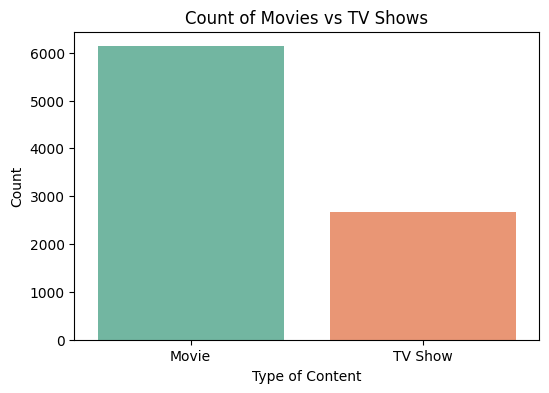

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='type', data=netflix_df, palette='Set2')
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()


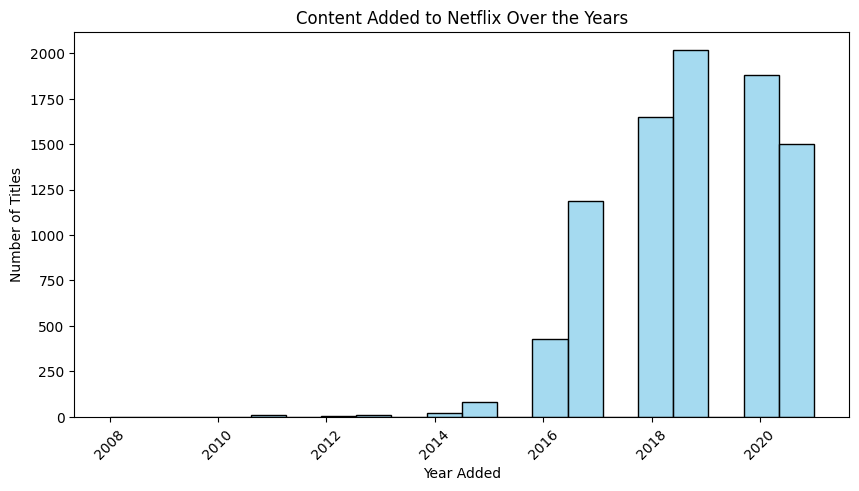

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(netflix_df['year_added'].dropna(), bins=20, kde=False, color='skyblue')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\3580070681.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


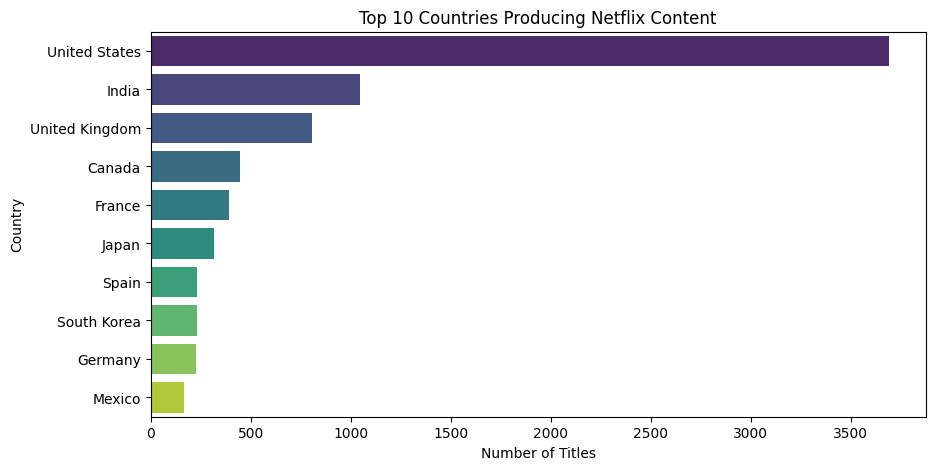

In [9]:
top_countries = netflix_df['country'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\1748916378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


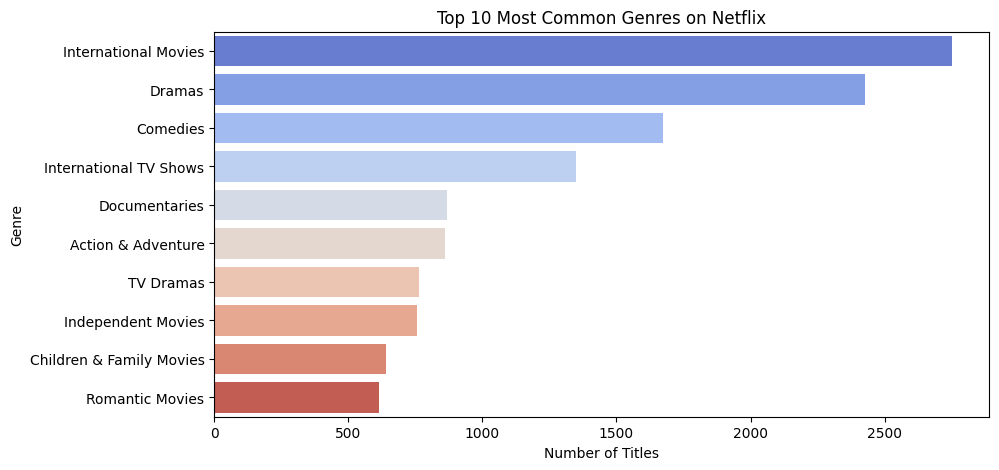

In [10]:
top_genres = netflix_df['listed_in'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


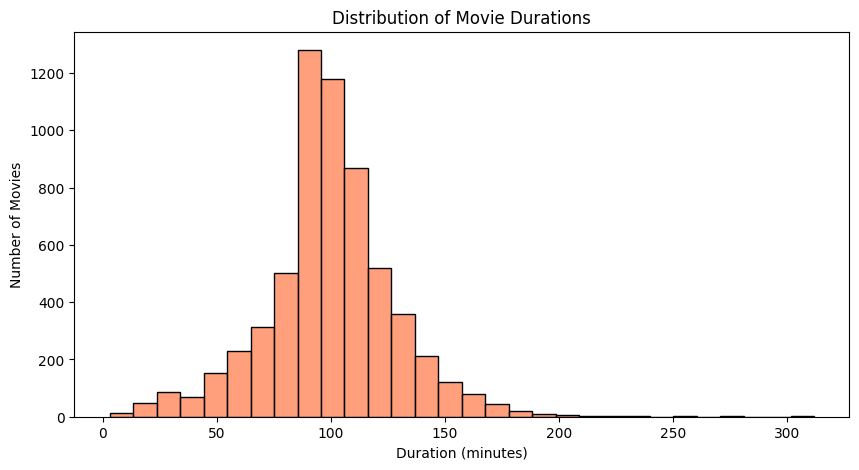

In [21]:

plt.figure(figsize=(10,5))
sns.histplot(data=netflix_df[netflix_df['type'] == 'Movie'], x='duration_int', bins=30, color='coral')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\3867530718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')


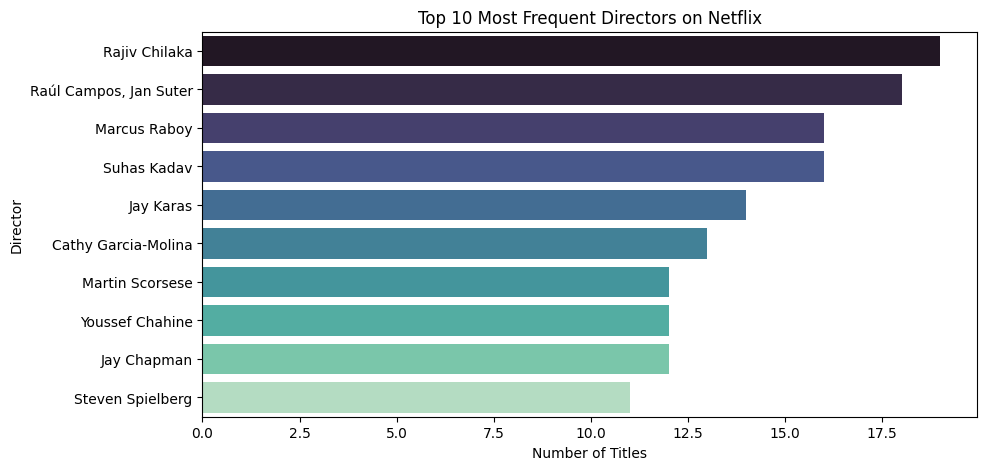

<Figure size 640x480 with 0 Axes>

In [ ]:
top_directors = netflix_df['director'].dropna().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()




C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\1721869813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='flare')


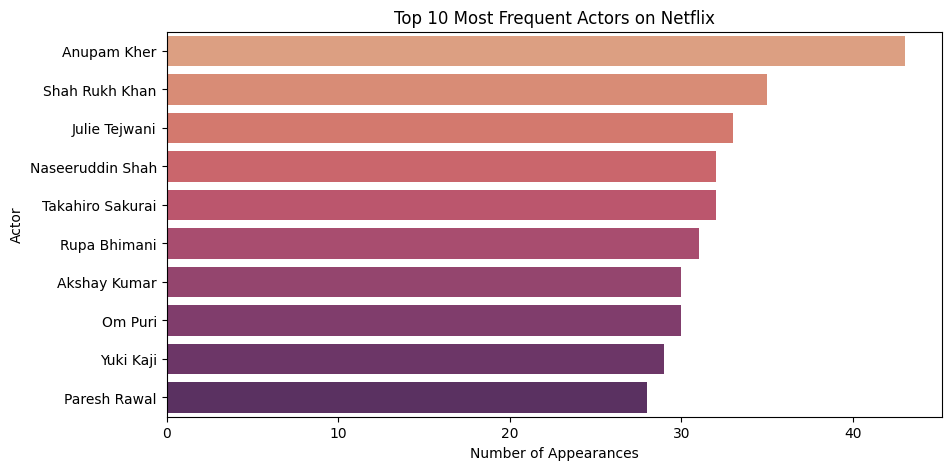

In [13]:
top_actors = netflix_df['cast'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='flare')
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\3660102536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_content.index, y=monthly_content.values, palette='pastel')


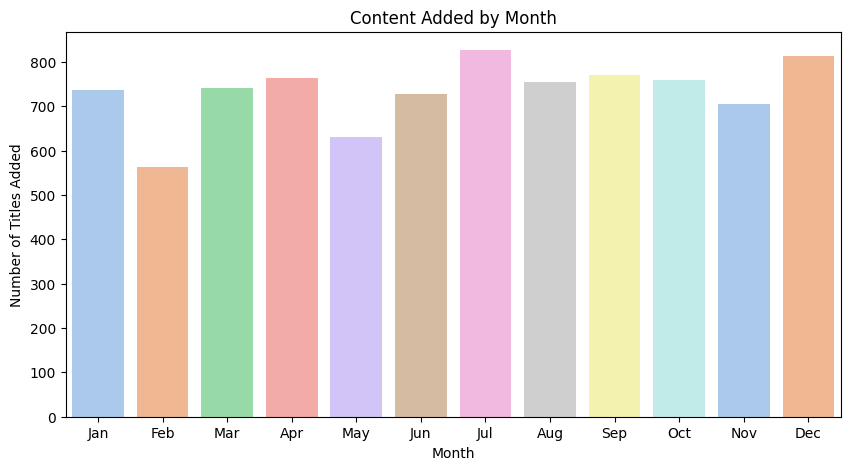

In [14]:
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

monthly_content = netflix_df['month_added'].dropna().map(month_map).value_counts().reindex(list(month_map.values()))

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_content.index, y=monthly_content.values, palette='pastel')
plt.title("Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.show()


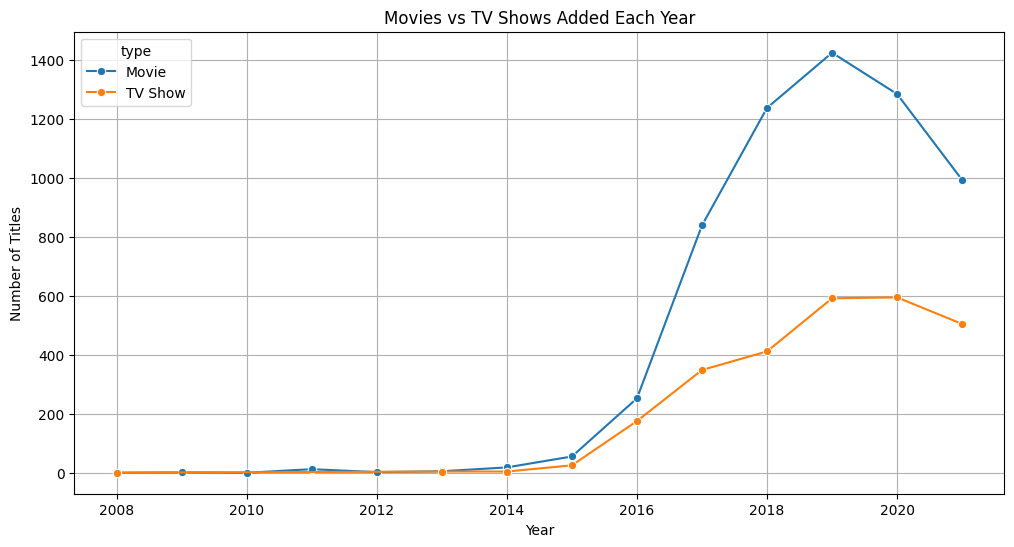

In [15]:
content_trend = netflix_df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='year_added', y='count', hue='type', marker='o')
plt.title("Movies vs TV Shows Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\3400583766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='Set3')


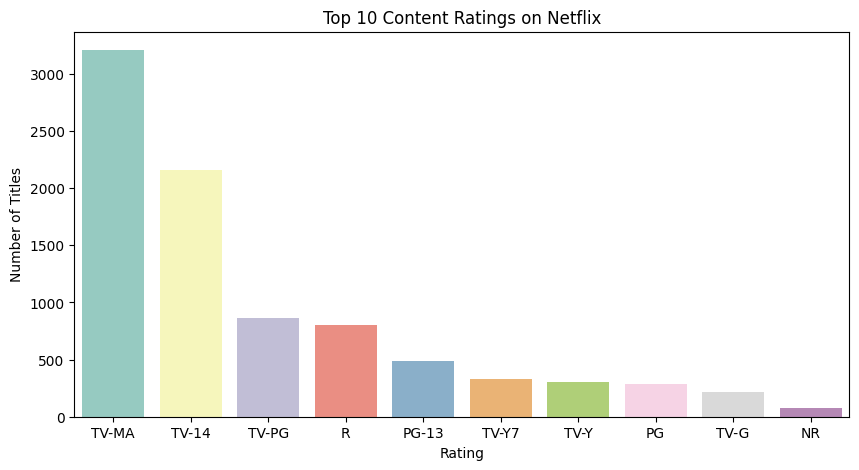

In [16]:
top_ratings = netflix_df['rating'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='Set3')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\3724556828.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_duration.values, y=top_avg_duration.index, palette='rocket')


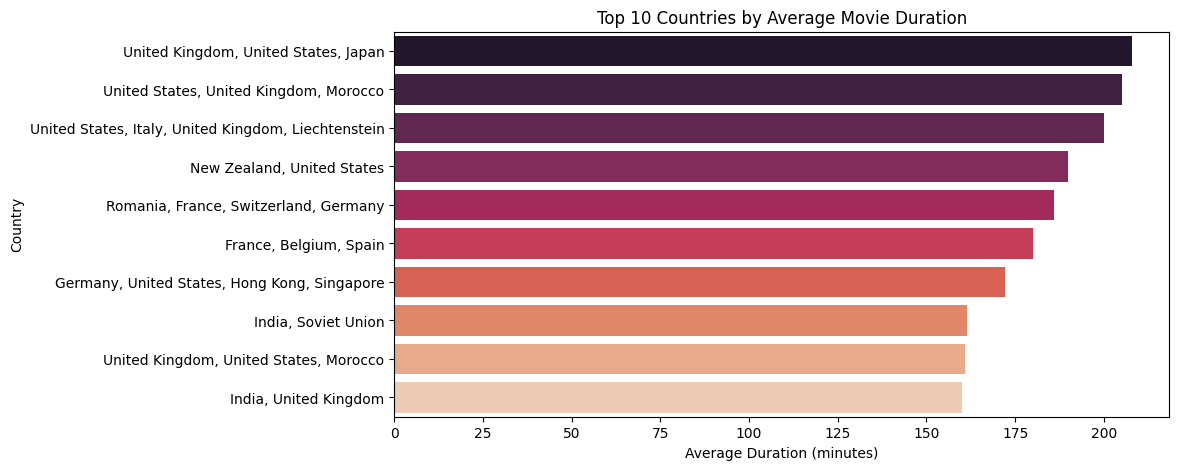

In [22]:
country_duration = netflix_df[netflix_df['type'] == 'Movie']
country_duration = country_duration.dropna(subset=['country', 'duration_int'])
top_avg_duration = country_duration.groupby('country')['duration_int'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_avg_duration.values, y=top_avg_duration.index, palette='rocket')
plt.title("Top 10 Countries by Average Movie Duration")
plt.xlabel("Average Duration (minutes)")
plt.ylabel("Country")
plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_11828\2850160419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movie_genres.values, y=top_movie_genres.index, palette='Spectral')


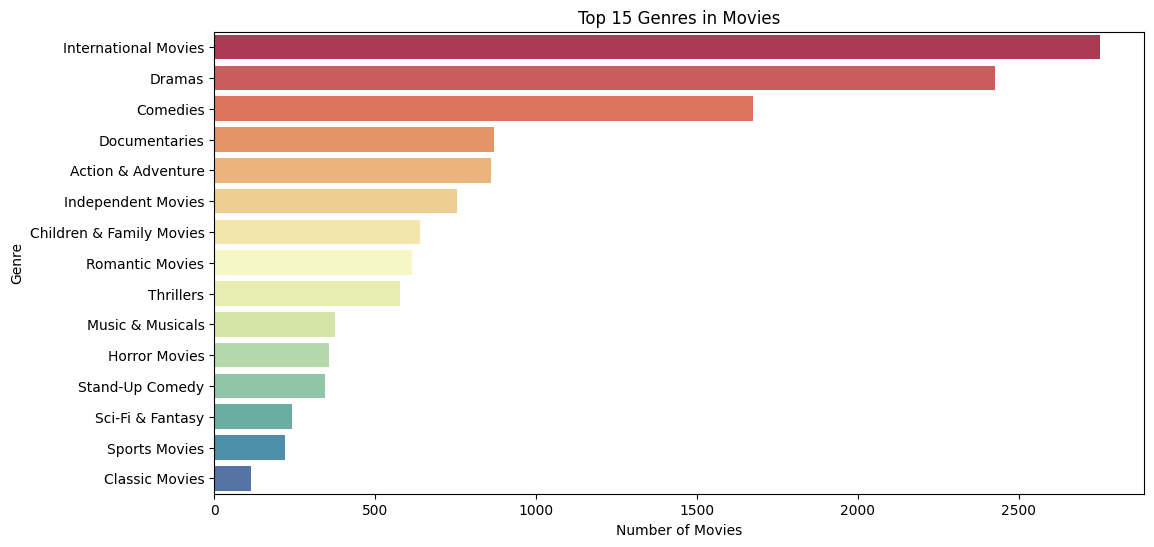

In [23]:
movie_genres = netflix_df[netflix_df['type'] == 'Movie']
top_movie_genres = movie_genres['listed_in'].str.split(', ').explode().value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_movie_genres.values, y=top_movie_genres.index, palette='Spectral')
plt.title("Top 15 Genres in Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


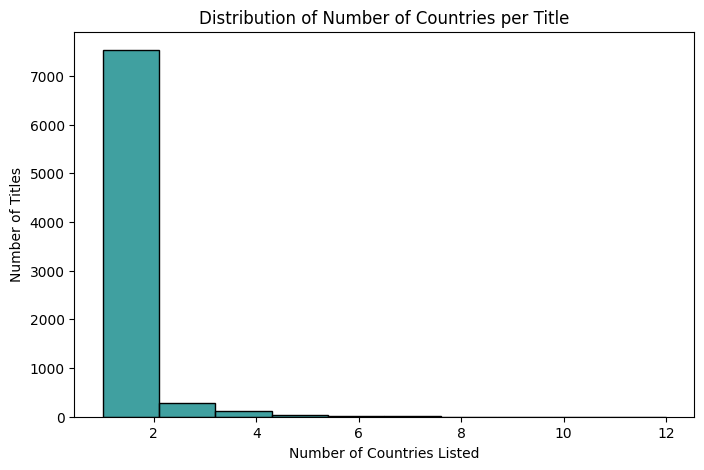

In [24]:
country_counts = netflix_df['country'].dropna().str.split(', ').apply(len)

plt.figure(figsize=(8,5))
sns.histplot(country_counts, bins=10, color='teal')
plt.title("Distribution of Number of Countries per Title")
plt.xlabel("Number of Countries Listed")
plt.ylabel("Number of Titles")
plt.show()


In [25]:
# Drop rows with missing 'release_year'
netflix_df = netflix_df.dropna(subset=['release_year'])

oldest = netflix_df.sort_values('release_year').head(5)
newest = netflix_df.sort_values('release_year', ascending=False).head(5)

print("🎬 Oldest Titles on Netflix:\n", oldest[['title', 'release_year', 'type']])
print("\n🆕 Newest Titles on Netflix:\n", newest[['title', 'release_year', 'type']])


🎬 Oldest Titles on Netflix:
                                               title  release_year     type
4250              Pioneers: First Women Filmmakers*          1925  TV Show
7790                                 Prelude to War          1942    Movie
8205                           The Battle of Midway          1942    Movie
8660  Undercover: How to Operate Behind Enemy Lines          1943    Movie
8739             Why We Fight: The Battle of Russia          1943    Movie

🆕 Newest Titles on Netflix:
                                      title  release_year     type
693                 Ali & Ratu Ratu Queens          2021    Movie
781  Black Holes | The Edge of All We Know          2021    Movie
762                           Sweet & Sour          2021    Movie
763                            Sweet Tooth          2021  TV Show
764           Trippin' with the Kandasamys          2021    Movie


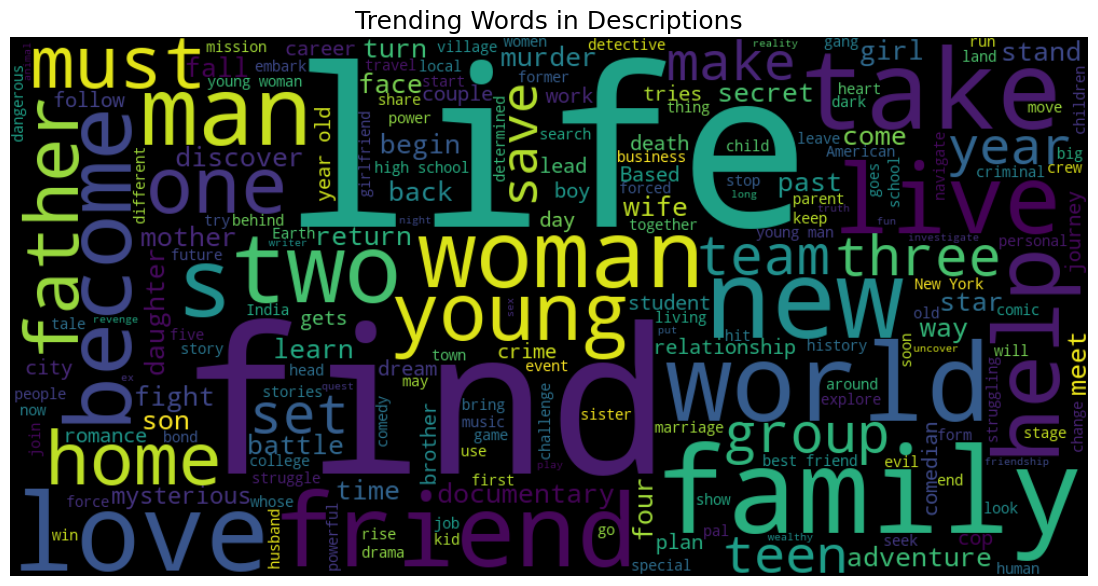

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(netflix_df['description'].dropna())

# Add extra stopwords if needed
stopwords = set(STOPWORDS)
stopwords.update(['Netflix', 'film', 'series'])

wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=1000, height=500).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Trending Words in Descriptions", fontsize=18)
plt.show()
plt.savefig('visuals/top_wordcloud.png')



In [27]:
# Movies
longest_movies = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['duration_int'].notnull())]
longest_movies = longest_movies.sort_values(by='duration_int', ascending=False).head(5)
print("🎥 Longest Movies:\n", longest_movies[['title', 'duration', 'country']])

# TV Shows
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']
tv_shows = tv_shows.sort_values(by='duration_int', ascending=False).head(5)
print("\n📺 Longest TV Shows (by Seasons):\n", tv_shows[['title', 'duration', 'country']])


🎥 Longest Movies:
                             title duration        country
4253   Black Mirror: Bandersnatch  312 min  United States
717   Headspace: Unwind Your Mind  273 min            NaN
2491       The School of Mischief  253 min          Egypt
2487               No Longer kids  237 min          Egypt
2484           Lock Your Girls In  233 min            NaN

📺 Longest TV Shows (by Seasons):
                        title    duration                country
548           Grey's Anatomy  17 Seasons          United States
2423            Supernatural  15 Seasons  United States, Canada
4798                    NCIS  15 Seasons          United States
1354               Heartland  13 Seasons                 Canada
4220  COMEDIANS of the world  13 Seasons          United States


In [28]:
print("📊 Total Titles:", netflix_df.shape[0])
print("🎞️ Movies:", netflix_df[netflix_df['type'] == 'Movie'].shape[0])
print("📺 TV Shows:", netflix_df[netflix_df['type'] == 'TV Show'].shape[0])
print("🌍 Unique Countries:", netflix_df['country'].nunique())
print("🎭 Unique Genres:", netflix_df['listed_in'].str.split(', ').explode().nunique())
print("🗓️ Time range:", netflix_df['release_year'].min(), "-", netflix_df['release_year'].max())


📊 Total Titles: 8807
🎞️ Movies: 6131
📺 TV Shows: 2676
🌍 Unique Countries: 748
🎭 Unique Genres: 42
🗓️ Time range: 1925 - 2021


<Figure size 640x480 with 0 Axes>